In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
fraud= pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
fraud.duplicated().sum()

0

In [9]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [15]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

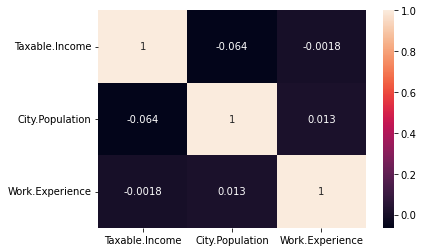

In [10]:
import seaborn as sns
sns.heatmap(fraud.corr(),annot=True)

In [11]:
features=(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'])

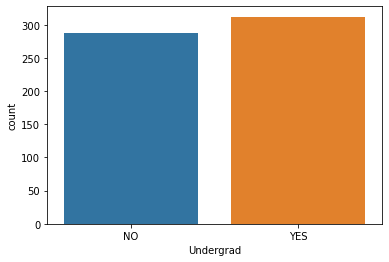

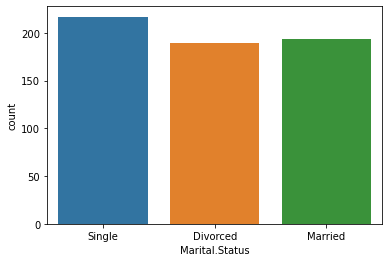

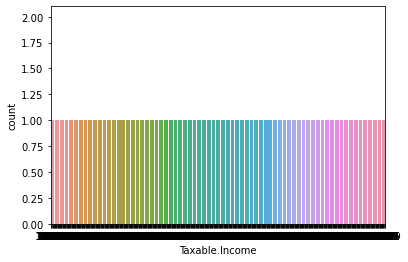

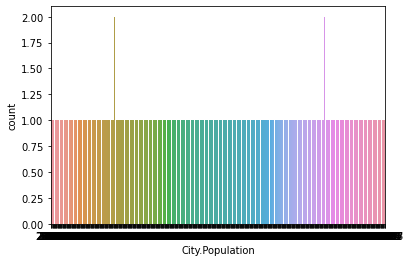

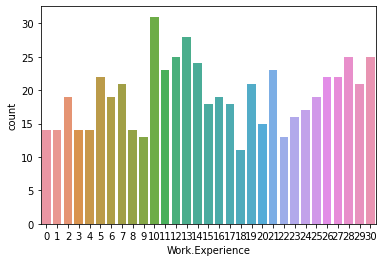

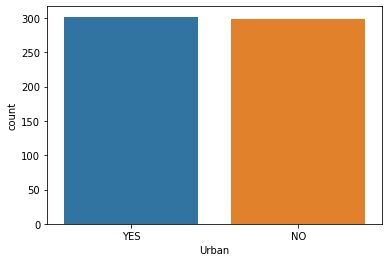

In [13]:
import warnings
warnings.filterwarnings('ignore')
for feature in features:
    sns.countplot(fraud[feature])
    plt.show()

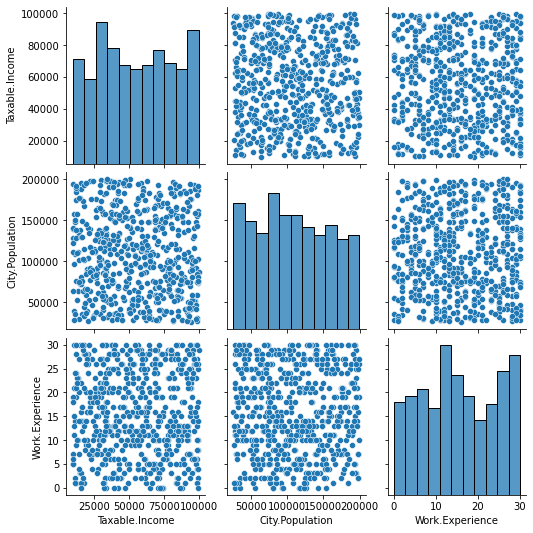

In [14]:
sns.pairplot(fraud[features])

In [17]:
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [18]:
fraud.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'tax_in', 'City.Population': 'city_popu',
                    'Work.Experience': 'work_exp'}, inplace= True)
fraud['status'] = fraud['tax_in'].apply(lambda tax_in: 'Risky' if tax_in <= 30000 else 'Good')
fraud.head()


,Undergrad,marital_status,tax_in,city_popu,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [19]:
fraud.drop(['tax_in'], axis=1, inplace=True)
fraud['status'] = label_encoder.fit_transform(fraud['status'])

In [20]:
x = fraud.iloc[:,0:5]
y = fraud['status']

In [21]:
x

,Undergrad,marital_status,city_popu,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [23]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=40)

In [25]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[2] <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.375, 'X[4] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(0.75, 0.625, 'X[2] <= 64532.5\ngini = 0.345\nsamples = 374\nvalue = [291, 83]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 130296.0\ngini = 0.341\nsamples = 372\nvalue = [291, 81]'),
 Text(0.75, 0.125, 'gini = 0.376\nsamples = 203\nva

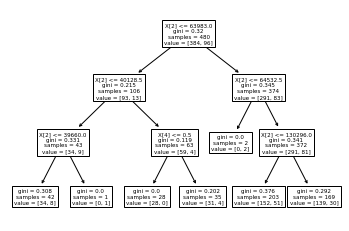

In [27]:
tree.plot_tree(model)

[Text(0.5416666666666666, 0.875, 'Taxable.Income <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]\nclass = Risky'),
 Text(0.3333333333333333, 0.625, 'Taxable.Income <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]\nclass = Risky'),
 Text(0.16666666666666666, 0.375, 'Taxable.Income <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]\nclass = Risky'),
 Text(0.08333333333333333, 0.125, 'gini = 0.308\nsamples = 42\nvalue = [34, 8]\nclass = Risky'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.5, 0.375, 'Work.Experience <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]\nclass = Risky'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = Risky'),
 Text(0.5833333333333334, 0.125, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]\nclass = Risky'),
 Text(0.75, 0.625, 'Taxable.Income <= 64532.5\ngini = 0.345\nsamples = 374\nvalue = [291, 83]\nclass = Risky'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\

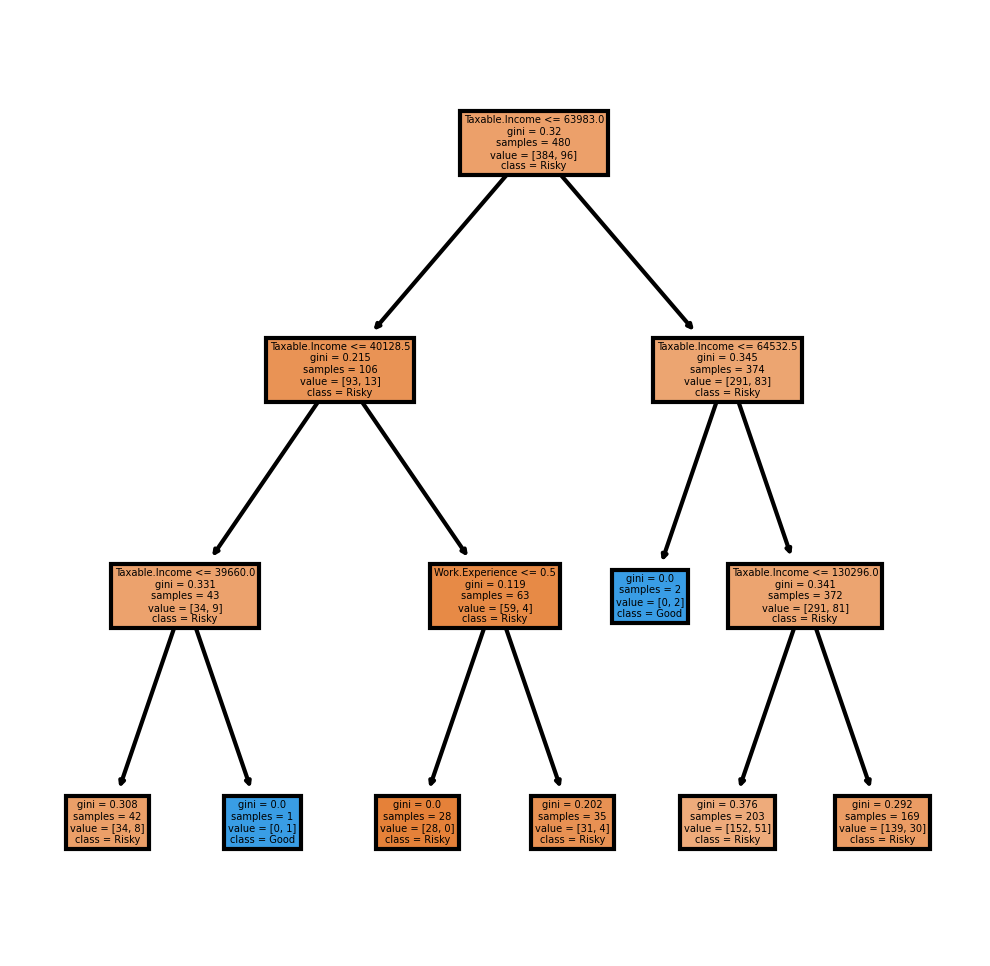

In [29]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True) 

In [30]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    119
1      1
dtype: int64

In [31]:
x_test

,Undergrad,marital_status,city_popu,work_exp,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [32]:
np.mean(preds==y_test)

0.7583333333333333

In [33]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



In [34]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_2 <= 63983.00
|   |--- feature_2 <= 40128.50
|   |   |--- feature_2 <= 39660.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  39660.00
|   |   |   |--- class: 1
|   |--- feature_2 >  40128.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|--- feature_2 >  63983.00
|   |--- feature_2 <= 64532.50
|   |   |--- class: 1
|   |--- feature_2 >  64532.50
|   |   |--- feature_2 <= 130296.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  130296.00
|   |   |   |--- class: 0



In [35]:
model.feature_importances_

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])

In [36]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    119
1      1
dtype: int64

In [37]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
status,,
0,91,1
1,28,0


In [39]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

In [40]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [41]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7583333333333333